# Optical Bistability of Second-order Nonlinear Effects 

*yesunhuang 2019/11/5 last updated*   
*Refering to QuTiP lecture: Single-Atom-Lasing*

In [1]:
# setup the matplotlib graphics library and configure it to show 
# figures inline in the notebook
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# make qutip available in the rest of the notebook
from qutip import *
from scipy import *

from IPython.display import Image

## Theoritical model

The Hamiltonian of the model is descrided as
$$
H_{rot}=\hbar\Delta_{a}a^{\dagger}a+\hbar\Delta_{b}b^{\dagger}b+\hbar g_{nl}[b(a^{\dagger}])^2+b^{\dagger}a^2]+\sqrt{2\kappa_{ra}}E(a^{\dagger}+a).
$$

The evolution of the density matrix is descrided as
$$
\frac{d\rho}{dt}=-i[H_{rot},\rho]+\sum_{i=a,b}\kappa_i[2A_i\rho A_i^{\dagger}-A_i^{\dagger}A_i\rho-\rho A_i^{\dagger}A_i]
$$

where $g_{nl}$ is the cavity constant,and  E denotes the amplitude of the electric field of the driving laser.  
And reflection, transmission and absorption losses are expressed in decay rates denoted as $\kappa_{ra,rb},\kappa_{ta,tb}\,and\,\kappa_{la,lb}$.  
Besides,$\Delta_{a,b}$describes the detuning of each cavity mode from the laser frequency.

According to the phrase matching condition, we have the following relations:
$$
\Delta_b=2\Delta_a    \hspace{1cm}   \kappa_b=2\kappa_a
$$
And we neglect the absorptive lose:
$$
    \kappa_{ti}=\kappa_{ri}=\frac{\kappa_i}{2}\\
    i=a,b
$$
And in units where $\hbar T=1$
### Reference: 
*[Fryett, Taylor K. , C. M. Dodson , and A. Majumdar . "Cavity enhanced nonlinear optics for few photon optical bistability." Optics Express 23.12(2015):16246.](https://www.researchgate.net/publication/279248964_Cavity_enhanced_nonlinear_optics_for_few_photon_optical_bistability)

## Calculation

### Problem parameters

In [3]:
Delta_a=0.048*2*pi # detuning of  cavity mode a
Delta_b=0.048*2*2*pi# detuning of  cavity mode b
g=0.020*2*sci.pi#coupling strength

kappa_ta=0.03*2*pi# transmission rate of mode a
kappa_ra=0.03*2*pi#reflection rate of mode a

kappa_tb=2*kappa_ta# transmission rate of mode b
kappa_rb=2*kappa_ra#reflection rate of mode b

E_0=0.04#Actually E_0/hbar

N=15

tlist=np.linspace(0,150,101)

### Setup the operators, the Hamiltonian and initial state

In [4]:
#initial state
psi0=tensor(basis(N,2),basis(N,1))#2 photons in a and one photons in b

#operators
a=tensor(destroy(N),qeye(N))
b=tensor(qeye(N),destroy(N))

#Hamiltonian
H=Delta_a*a.dag()*a+Delta_b*b.dag()*b\
+g*(b*a.dag()*a.dag()+b.dag()*a*a)+sqrt(2*kappa_ra)*E_0*(a.dag()+a)

In [5]:
H

Quantum object: dims = [[15, 15], [15, 15]], shape = (225, 225), type = oper, isherm = True
Qobj data =
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.60318579  0.         ...  0.          0.
   0.        ]
 [ 0.          0.          1.20637158 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ... 11.46053     0.
   0.        ]
 [ 0.          0.          0.         ...  0.         12.06371579
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
  12.66690158]]

### Create a list of collapse operators that describe the dissipation

In [6]:
#collapse operators
c_ops=[]

rate=2*(kappa_ta+kappa_ra)
if rate > 0.0:
    c_ops.append(sqrt(rate)*a)

rate=2*(kappa_tb+kappa_rb)
if rate > 0.0:
    c_ops.append(sqrt(rate)*b)


In [7]:
c_ops

[Quantum object: dims = [[15, 15], [15, 15]], shape = (225, 225), type = oper, isherm = False
 Qobj data =
 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]],
 Quantum object: dims = [[15, 15], [15, 15]], shape = (225, 225), type = oper, isherm = False
 Qobj data =
 [[0.         1.22799205 0.         ... 0.         0.         0.        ]
  [0.         0.         1.73664301 ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  ...
  [0.         0.         0.         ... 0.         4.4275883  0.        ]
  [0.         0.         0.         ... 0.         0.         4.59472552]
  [0.         0.         0.         ... 0.         0.         0.        ]]]

### Evolve the system

In [8]:
opt = Odeoptions(nsteps=2000)#allow extra time-steps 
output = mesolve(H, psi0, tlist, c_ops, [a.dag() * a, b.dag() * b], options=opt)

## Visualize the result

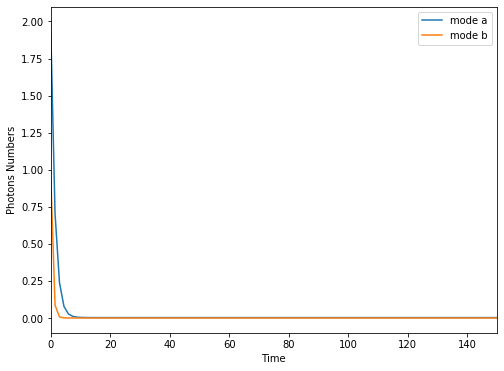

In [9]:
n_a = output.expect[0]
n_b = output.expect[1]

fig, axes = plt.subplots(1, 1, figsize=(8,6))

axes.plot(tlist, n_a, label="mode a")
axes.plot(tlist, n_b, label="mode b")
axes.set_xlim(0, 150)
axes.legend(loc=0)
axes.set_xlabel('Time')
axes.set_ylabel('Photons Numbers');

### Steady state and Ouput power

In [10]:
rho_ss = steadystate(H, c_ops)

In [11]:
P_trans=2*kappa_ta*expect(a.dag()*a,rho_ss)#is need to mutiply by hOmiga_a.
P_trans

0.0009755301235006027

In [12]:
P_in=E_0*E_0
output_rate=P_trans/P_in
output_rate

0.6097063271878767

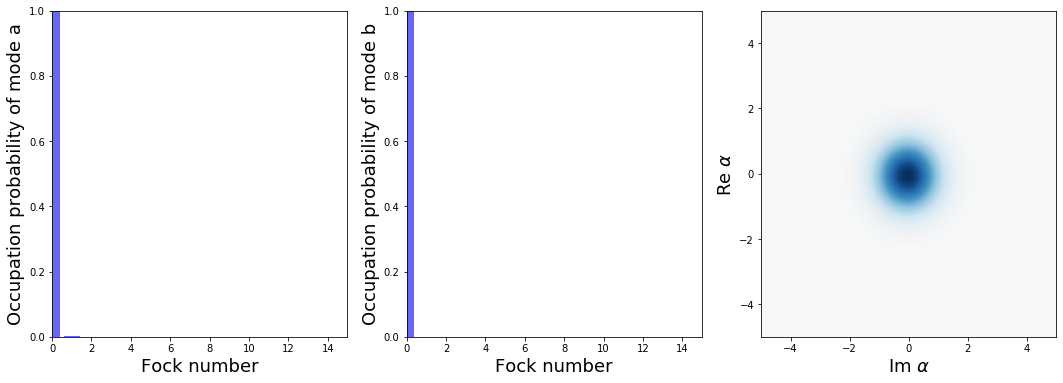

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(18,6))

xvec = np.linspace(-5,5,200)

rho_a = ptrace(rho_ss, 0)
rho_b=ptrace(rho_ss,1)
W = wigner(rho_a, xvec, xvec)
wlim = abs(W).max()

axes[2].contourf(xvec, xvec, W, 100, norm=mpl.colors.Normalize(-wlim,wlim), cmap=plt.get_cmap('RdBu'))
axes[2].set_xlabel(r'Im $\alpha$', fontsize=18)
axes[2].set_ylabel(r'Re $\alpha$', fontsize=18)

axes[0].bar(arange(0, N), real(rho_a.diag()), color="blue", alpha=0.6)
axes[0].set_ylim(0, 1)
axes[0].set_xlim(0, N)
axes[0].set_xlabel('Fock number', fontsize=18)
axes[0].set_ylabel('Occupation probability of mode a', fontsize=18);

axes[1].bar(arange(0, N), real(rho_b.diag()), color="blue", alpha=0.6)
axes[1].set_ylim(0, 1)
axes[1].set_xlim(0, N)
axes[1].set_xlabel('Fock number', fontsize=18)
axes[1].set_ylabel('Occupation probability of mode b', fontsize=18);